In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv('WorldIndex.csv')

去除空值

In [2]:
data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

,Country,Continent,Life_expectancy,GDP_per_capita,Population
0,Algeria,Africa,75.042537,4132.760292,39871528.0
1,Angola,Africa,52.666098,3695.793748,27859305.0
2,Benin,Africa,59.720707,783.947091,10575952.0
3,Botswana,Africa,64.487415,6532.060501,2209197.0
4,Burundi,Africa,57.107049,303.681022,10199270.0
5,Cameroon,Africa,55.934390,1244.429421,22834522.0
6,Central African Republic,Africa,51.419122,348.381417,4546100.0
7,Chad,Africa,51.873317,777.248705,14009413.0
8,Comoros,Africa,63.554024,727.646387,777424.0
9,Congo,Africa,62.867659,1712.121131,4995648.0


人均寿命直方图

In [9]:
datasetLife = data["Life_expectancy"]

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt #为创建图形示例提供一些方法

Text(0.5, 0, 'class interval')

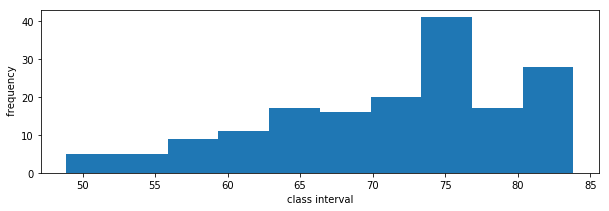

In [15]:
fig, ax = plt.subplots(1,1,figsize=(10, 3))
#直方图
ax.hist(datasetLife) 
ax.set_ylabel(" frequency")
ax.set_xlabel("class interval")

人均GDP直方图

In [16]:
datasetGDP = data["GDP_per_capita"]

Text(0.5, 0, 'class interval')

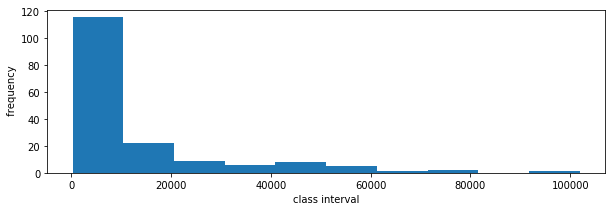

In [17]:
fig, ax = plt.subplots(1,1,figsize=(10, 3))
#GDP直方图
ax.hist(datasetGDP) 
ax.set_ylabel(" frequency")
ax.set_xlabel("class interval")

人均寿命箱线图

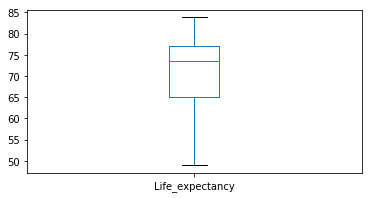

In [21]:
fig, ax = plt.subplots(1,1,figsize=(6, 3))
data.Life_expectancy.plot.box()

绘制每个大洲的国家个数条形图

In [42]:
datasetCountry = data["Continent"]
list1 = datasetCountry.values.tolist()
continent = dict(zip(*np.unique(list1, return_counts=True)))
continent

{'Africa': 50,
 'Asia': 36,
 'Europe': 45,
 'North America': 20,
 'Oceania': 14,
 'South America': 12}

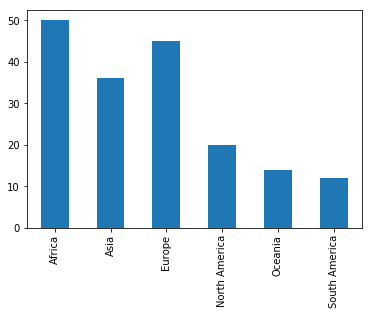

In [43]:
continent = pd.Series(continent)
continent.plot(kind='bar')

绘制各大洲国家数量占比的饼图

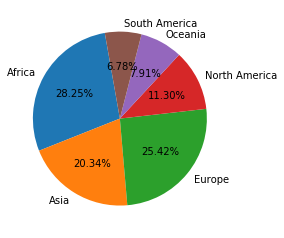

In [44]:
plt.pie(continent,labels=continent.index,autopct='%.2f%%',shadow=False,startangle=100)
plt.show()

绘制人均寿命和人均GDP的关系（散点）

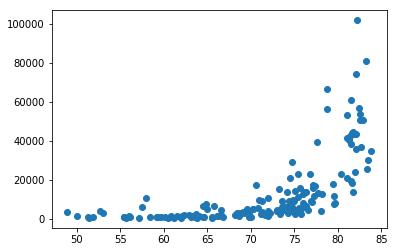

In [45]:
plt.scatter(datasetLife,datasetGDP)
plt.show()

人均GDP与人均寿命的气泡图（数据点大小，正比于人口数，给不同洲的国家设置不同的颜色）

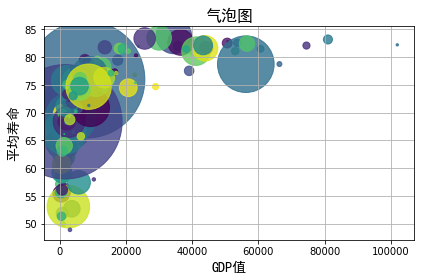

In [61]:
datasetPopulation = data["Population"]
fig, ax = plt.subplots()
color = np.random.rand(len(list(datasetCountry)))
ax.scatter(datasetGDP,datasetLife,s = list(datasetPopulation/100000),c=color,alpha=0.8)
ax.set_title("气泡图",fontproperties = "simHei",fontsize = 16)
ax.set_xlabel("GDP值",fontproperties = "simHei",fontsize = 14)
ax.set_ylabel("平均寿命",fontproperties = "simHei",fontsize = 14)
ax.grid(True)
fig.tight_layout()
plt.show()

Scipy解方程

①	求解f(x)=2*sin(x)-x+1

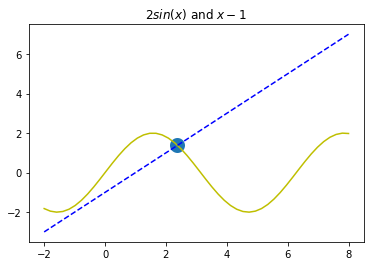

In [72]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root,fsolve

x1 = np.linspace(-2,8)
y1_1,y1_2 = 2*np.sin(x1),x1-1
plt.figure(1)
plt.plot(x1,y1_1,'y',x1,y1_2,'b--')
plt.title('$2sin(x)$ and $x-1$')

def f(x):
    return np.sin(x)*2-x+1

sol1_root = root(f,[2])
sol1_fsolve = fsolve(f,[2])
plt.scatter(sol1_fsolve,2*np.sin(sol1_fsolve),linewidths=9)
plt.show()

②	求解线性方程组{3X1+2X2=3;X1-2X2=5}

In [73]:
from sympy import *
x1 = Symbol('x1')
x2 = Symbol('x2')
print(solve([3 * x1 + 2*x2 - 3, x1 - 2*x2 - 5],[x1, x2]))

{x1: 2, x2: -3/2}
